In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import operator
import csv
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import History

/home/kris/PycharmProjects/SUS/lab1/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_train = pd.read_csv('X_train.csv', index_col=0)

In [3]:
y_train = pd.read_csv('y_train.csv', index_col=0)

In [ ]:
decks = pd.read_csv("./decks.csv", index_col=0)

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000)
tsne_results = tsne.fit_transform(decks.iloc[:, 0:-1])

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.008s...
[t-SNE] Computed neighbors for 400 samples in 0.107s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 2.705503


[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.195015


[t-SNE] Error after 1000 iterations: 0.141551


In [ ]:
prob = pd.read_csv("./training_games_prob.csv", index_col=0)

/home/kris/PycharmProjects/SUS/lab1/venv/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/kris/PycharmProjects/SUS/lab1/venv/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/kris/PycharmProjects/SUS/lab1/venv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


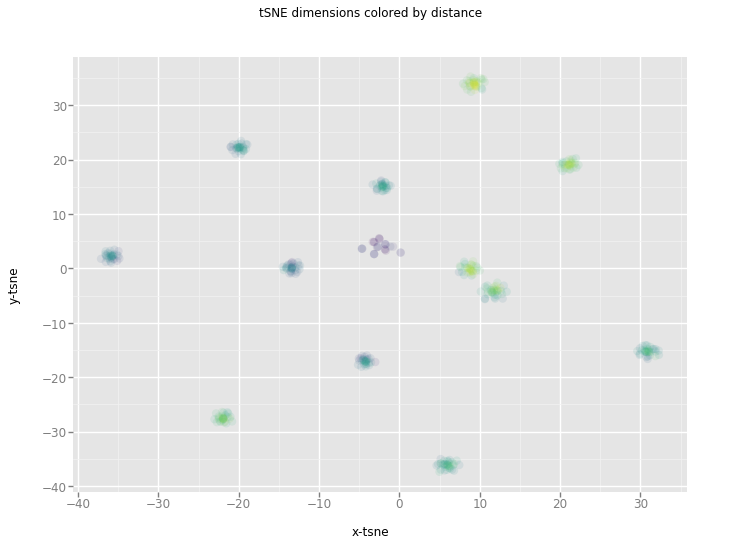

<ggplot: (-9223363248253141244)>

In [12]:
%matplotlib inline
from ggplot import *

df_tsne = decks.copy()
df_tsne['x-tsne'] = tsne_results[:, 0]
df_tsne['y-tsne'] = tsne_results[:, 1]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne')) \
        + geom_point(aes(colour='prob'), size=70, alpha=0.1) \
        + ggtitle("tSNE dimensions colored by distance")
chart

In [11]:
batch_size = 128
num_classes = 1
nepochs = 10
learning_rate = 0.03
decay_rate = learning_rate / nepochs

In [12]:
model = Sequential()

model.add(Conv1D(32, 3, padding='same', input_shape=(686, 1), activation='hard_sigmoid'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.1))

model.add(Conv1D(32, 3, padding='same', activation='hard_sigmoid'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.2))

model.add(Conv1D(32, 3, padding='same', activation='hard_sigmoid'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.3))

model.add(Conv1D(32, 3, padding='same', activation='hard_sigmoid'))
model.add(MaxPooling1D(pool_size=2))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500, activation='hard_sigmoid'))
#model.add(Dropout(0.4))
model.add(Dense(500, activation='hard_sigmoid'))
model.add(Dense(num_classes, activation='sigmoid'))

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


In [13]:
#opt = keras.optimizers.RMSprop(lr=0.2)
opt = keras.optimizers.SGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])